In [2]:
from itertools import combinations

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

plt.figure(figsize=(20,20))
%matplotlib inline

### Define some variables
- Number of songs 2 countries must have in common in order to form an edge
- Songs in top X songs that must be in common. For example, if `SONGS_IN_COMMON_IN_TOP_X` = 1, and `TOP_X` = 5, then 2 countries must have a song in common in their respective top 5 songs to be considered linked
- Metadata fields that constitute an equivalence between songs

In [3]:
SONGS_IN_COMMON_IN_TOP_X = 5
TOP_X = 10
SONG_METADATA_FIELDS = ['Track Name', 'Artist']
G = nx.Graph()

### Load song data from disk

In [4]:
country_abbrevations = {
    'United States': 'us',
    'United Kingdom': 'gb',
    'Andorra': 'ad',
    'Argentina': 'ar',
    'Australia': 'au',
    'Austria': 'at',
    'Belgium': 'be',
    'Bolivia': 'bo',
    'Brazil': 'br',
    'Bulgaria': 'bg',
    'Canada': 'ca',
    'Chile': 'cl',
    'Colombia': 'co',
    'Costa': 'cr',
    'Cyprus': 'cy',
    'Czech': 'cz',
    'Denmark': 'dk',
    'Dominican Republic': 'do',
    'Ecuador': 'ec',
    'El Salvador': 'sv',
    'Estonia': 'ee',
    'Finland': 'fi',
    'France': 'fr',
    'Germany': 'de',
    'Greece': 'gr',
    'Guatemala': 'gt',
    'Honduras': 'hn',
    'Hong Kong': 'hk',
    'Hungary': 'hu',
    'Iceland': 'is',
    'Ireland': 'ie',
    'Italy': 'it',
    'Latvia': 'lv',
    'Lithuania': 'lt',
    'Luxembourg': 'lu',
    'Malaysia': 'my',
    'Malta': 'mt',
    'Mexico': 'mx',
    'Netherlands': 'nl',
    'New Zealand': 'nz',
    'Nicaragua': 'ni',
    'Norway': 'no',
    'Panama': 'pa',
    'Paraguay': 'py',
    'Peru': 'pe',
    'Philippines': 'ph',
    'Poland': 'pl',
    'Portugal': 'pt',
    'Singapore': 'sg',
    'Slovakia': 'sk',
    'Spain': 'es',
    'Sweden': 'se',
    'Switzerland': 'ch',
    'Taiwan': 'tw',
    'Turkey': 'tr',
    'Uruguay': 'uy'
}

In [5]:
TOP_SONGS = {}
for country in country_abbrevations.keys():
    path = 'data/{}.csv'.format(country_abbrevations[country])
    TOP_SONGS[country] = pd.read_csv(path, index_col=['Position'])

### Construct our graph, creating an edge if 2 countries share >= `SONGS_IN_COMMON` in their respective `TOP_X_SONGS`

In [12]:
for country_a, country_b in combinations(TOP_SONGS.keys(), 2):
    top_songs_a = TOP_SONGS[country_a][SONG_METADATA_FIELDS]
    top_songs_b = TOP_SONGS[country_b][SONG_METADATA_FIELDS]
    top_X_a = [tuple(song) for song in top_songs_a.ix[:TOP_X].values]
    top_X_b = [tuple(song) for song in top_songs_b.ix[:TOP_X].values]
    songs_in_common_in_top_X = len(set(top_X_a).intersection(set(top_X_b)))

    if songs_in_common_in_top_X >= SONGS_IN_COMMON_IN_TOP_X:
        G.add_edge(country_a, country_b, weight=songs_in_common_in_top_X)

### Who's most connected?
- Having a high degree centrality means 2 things: people are following you, or you're following them. Either way, highly connected countries are in with the hypest tracks.
- Having a low degree centrality, similarly, means you're not following others, and others aren't following you. The countries have a unique taste in music - for better or for worse.

In [33]:
degree_centrality_df = pd.DataFrame(
    data=pd.Series(nx.degree_centrality(G)).order(ascending=False),
    columns=['degree_centrality']
)

#### Top 10

In [34]:
degree_centrality_df.head(10)

,degree_centrality
Panama,0.925926
Dominican Republic,0.888889
Switzerland,0.851852
Guatemala,0.851852
Portugal,0.851852
Luxembourg,0.851852
Poland,0.833333
Slovakia,0.814815
Lithuania,0.814815
Brazil,0.796296


#### Bottom 10

In [35]:
degree_centrality_df.tail(10)

,degree_centrality
Norway,0.444444
Austria,0.407407
Iceland,0.370370
Ecuador,0.314815
Colombia,0.314815
Chile,0.314815
Uruguay,0.277778
Spain,0.240741
Finland,0.092593
Argentina,0.018519


#### Distribution of degree centralities

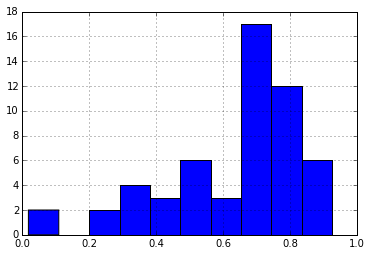

In [36]:
degree_centrality_df.degree_centrality.hist()